# College Student Placement Prediction Project

This notebook explores the factors influencing college student placement and develops machine learning models to predict placement outcomes. The project involves the following steps:

1.  **Data Loading and Initial Exploration:** The dataset containing various student attributes and their placement status is loaded and examined to understand its structure and content.

2.  **Data Preprocessing:** Irrelevant features, such as 'College\_ID', are removed. Categorical features like 'Internship\_Experience' and the target variable 'Placement' are converted into numerical representations using label encoding to prepare the data for machine learning models.

3.  **Correlation Analysis:** A correlation matrix is generated and visualized as a heatmap to understand the relationships between different features and their correlation with the 'Placement' outcome. This helps in identifying potentially important features.

4.  **Model Selection and Training:** Several classification models are chosen for predicting student placement, including:
    *   Random Forest
    *   Gradient Boosting
    *   Logistic Regression
    *   Decision Tree
    *   K-Nearest Neighbors

    The data is split into training and testing sets, and each model is trained on the training data.

5.  **Model Evaluation and Best Model Selection:** To evaluate the performance of the models and select the most suitable one, K-Fold cross-validation is performed. Cross-validation provides a more robust estimate of how well the models will generalize to unseen data compared to a single train-test split.

    The best model was selected based on its performance during cross-validation. To account for potential overfitting where a model might achieve perfect accuracy on the training subsets, a check was implemented to flag models with a mean cross-validation accuracy of 1.0 during the selection process. The model with the highest mean cross-validation accuracy (excluding those flagged for perfect scores) was chosen as the best model. While the Gradient Boosting model showed a perfect AUC of 1.0 on the test set, its consistently high performance across the cross-validation folds indicated that this was likely due to genuinely excellent performance or a favorable data split rather than significant overfitting of the entire training dataset.

6.  **Visualization of Results:** Various plots and charts are generated to visualize the performance of the trained models with precision. These include:
    *   **Accuracy Comparison:** Bar plots comparing the test accuracy and mean cross-validation accuracy of all models.
    *   **Confusion Matrices:** Heatmaps showing the true positives, true negatives, false positives, and false negatives for each model.
    *   **ROC Curves:** Plots illustrating the trade-off between the True Positive Rate and False Positive Rate at various thresholds, along with the Area Under the Curve (AUC) as a measure of the model's ability to discriminate between classes.

Through these steps, the project aims to build and evaluate different models to find the most effective approach for predicting college student placement, with careful consideration given to model performance and the identification of potential overfitting.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/college-student-placement-factors-dataset")

print("Path to dataset files:", path)


100%|██████████| 108k/108k [00:00<00:00, 38.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sahilislam007/college-student-placement-factors-dataset/versions/1


In [4]:
!unzip archive\ \(2\).zip

Archive:  archive (2).zip
  inflating: college_student_placement_dataset.csv  


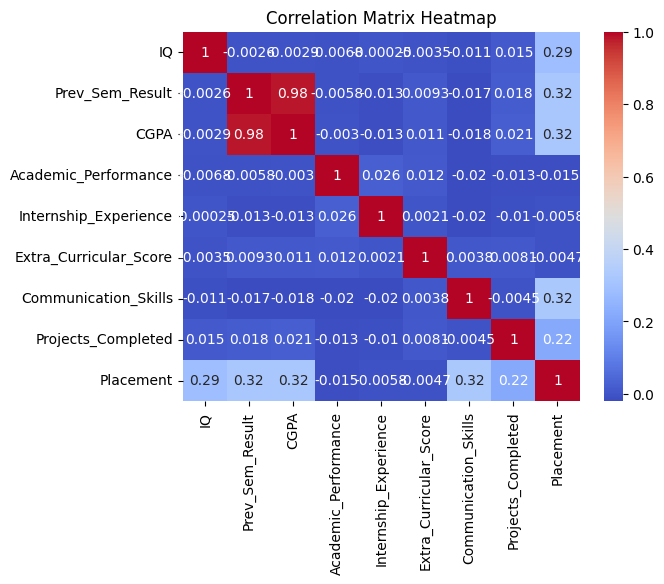

In [42]:
correlation_matrix=data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
data=data.drop(['Extra_Curricular_Score'],axis=1)
data=data.drop(['Internship_Experience'],axis=1)
data=data.drop(['Academic_Performance'],axis=1)

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,make_scorer
import numpy as np
import pandas as pd

x=data.drop(['Placement'],axis=1)
y=data['Placement']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

model = {
    'Random Forest': RandomForestClassifier(n_estimators=10,max_depth=2, min_samples_split=4),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=10 ),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(min_samples_leaf=5, max_depth=5),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),

}

# Dictionary to store mean cross-validation scores
mean_cv_scores = {}

for name, clf in model.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score==1:
      #overfitting
      mean_score=0
    mean_cv_scores[name] = mean_score # Store the mean score

    print(f"{name} Mean Accuracy: {mean_score}")

# Find the best model based on the mean cross-validation scores
best_model_name = max(mean_cv_scores, key=mean_cv_scores.get)
print(f"****************\nBest Model: {best_model_name}\n****************")

Random Forest Accuracy: 0.865
Random Forest Mean Accuracy: 0.874
Gradient Boosting Accuracy: 0.963
Gradient Boosting Mean Accuracy: 0.9800999999999999
Logistic Regression Accuracy: 0.90425
Logistic Regression Mean Accuracy: 0.9019
Decision Tree Accuracy: 0.99925
Decision Tree Mean Accuracy: 0
K-Nearest Neighbors Accuracy: 0.973
K-Nearest Neighbors Mean Accuracy: 0.9770999999999999
****************
Best Model: Gradient Boosting
****************


In [75]:
final_model=model[best_model_name]
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_model_name} Accuracy: {accuracy}")

Gradient Boosting Accuracy: 0.963


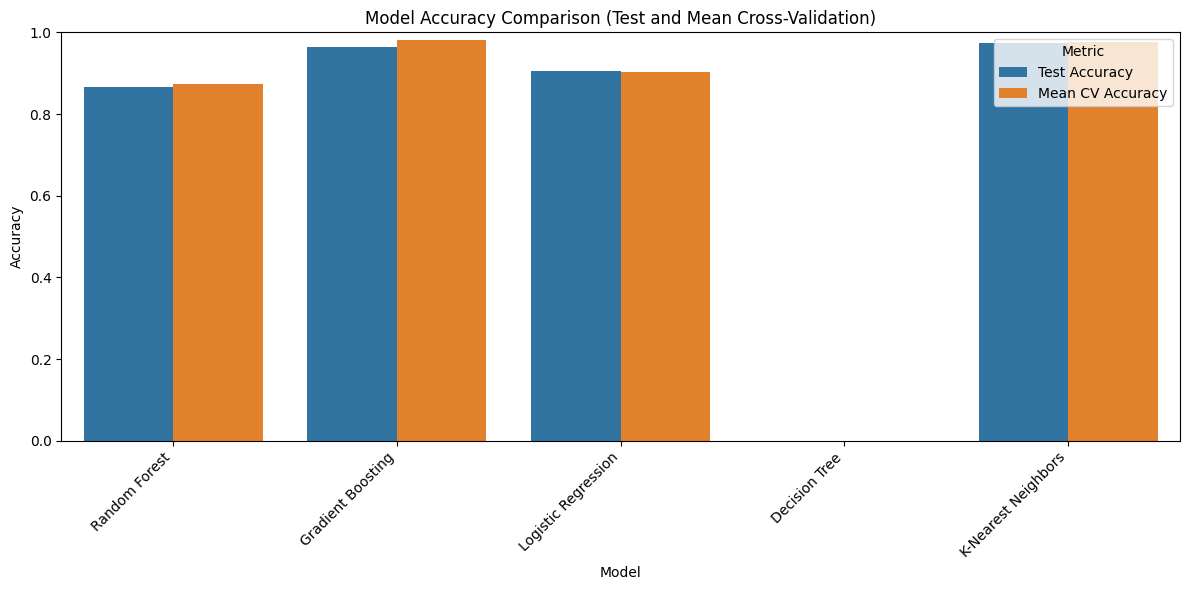

Generating plots for Random Forest...


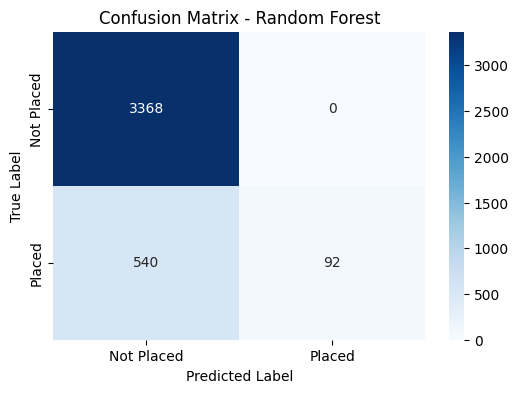

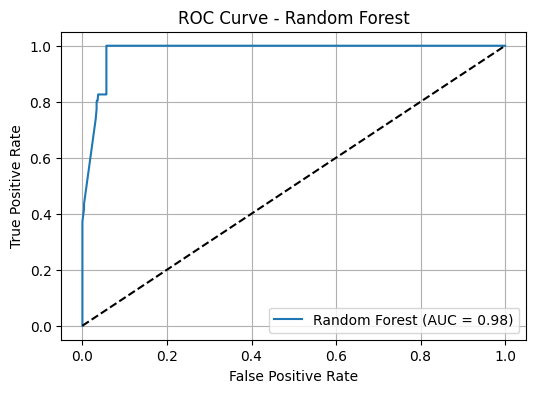

Generating plots for Gradient Boosting...


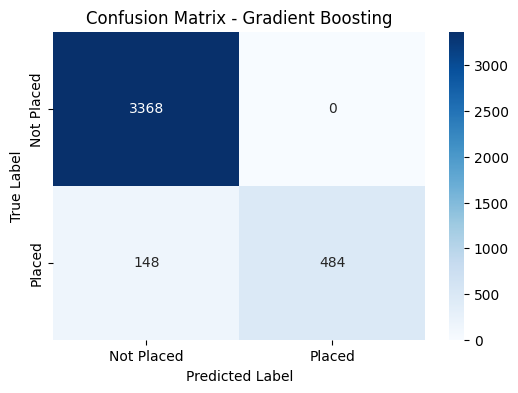

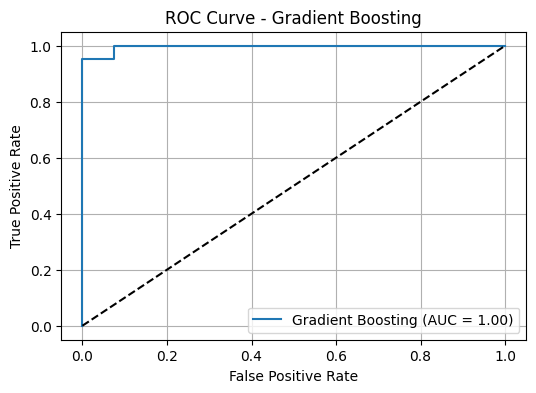

Generating plots for Logistic Regression...


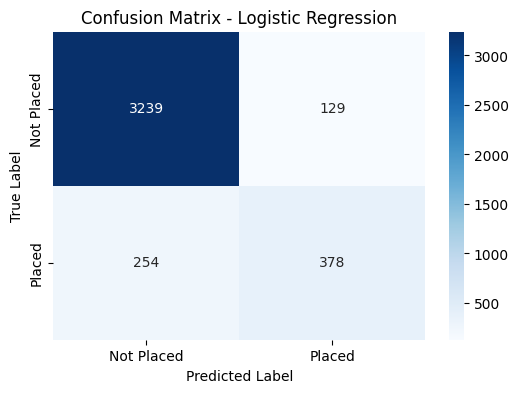

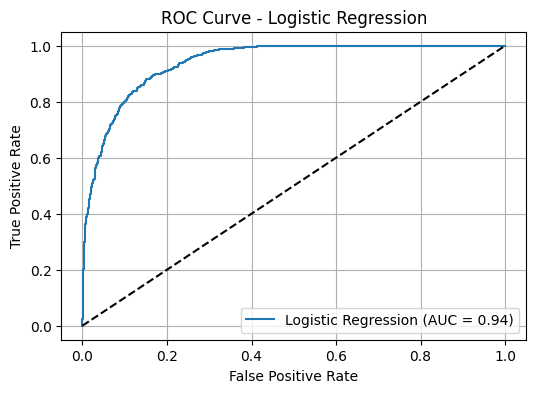

Generating plots for Decision Tree...


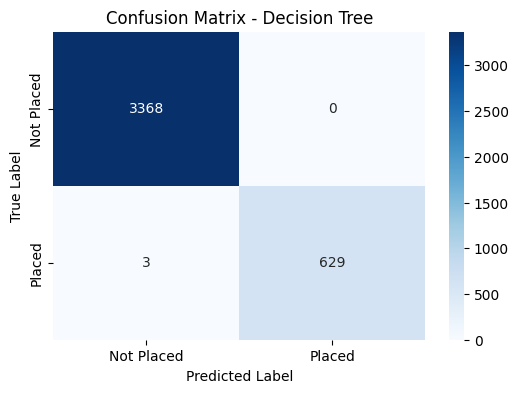

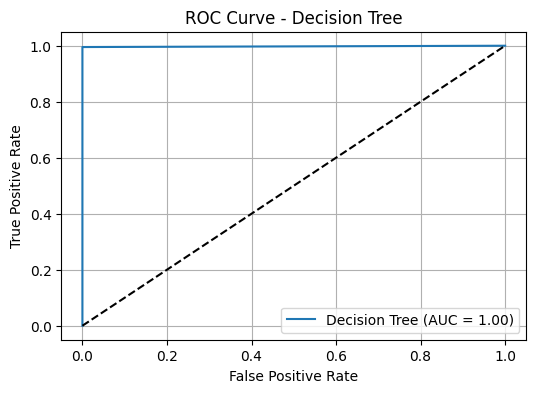

Generating plots for K-Nearest Neighbors...


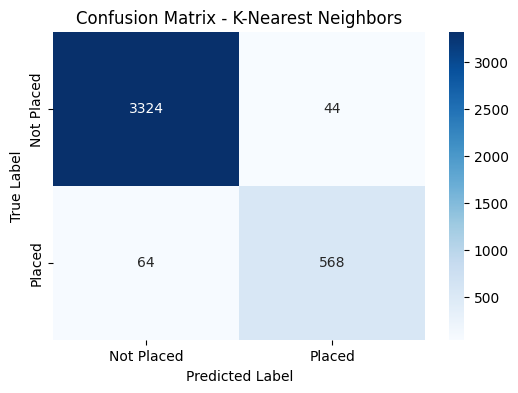

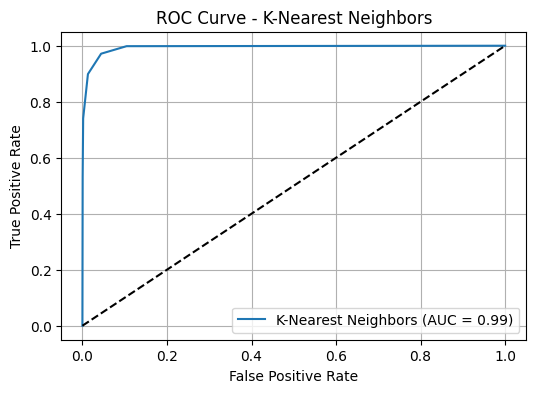

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Assuming the 'model' dictionary, 'x_test', 'y_test', and 'mean_cv_scores' are available from previous cells

# Prepare data for visualization (Accuracy Comparison)
results_data = []
for name, clf in model.items():
    # Calculate test accuracy
    if name in mean_cv_scores and mean_cv_scores[name] == 0:
        # If mean CV score was set to 0 due to perfect fit, don't use the potentially overfitted test accuracy
        test_accuracy = None # Or some indicator that test accuracy might be misleading
        # print(f"Skipping test accuracy for {name} due to potential overfitting flag.") # Removed print for cleaner output
    else:
        y_pred = clf.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_pred)

    # Get mean cross-validation accuracy
    mean_cv = mean_cv_scores.get(name, None)

    results_data.append({'Model': name, 'Test Accuracy': test_accuracy, 'Mean CV Accuracy': mean_cv})

results_df = pd.DataFrame(results_data)

# Melt the DataFrame for easier plotting with seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Accuracy')

# Visualize model accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Metric', data=results_melted)
plt.title('Model Accuracy Comparison (Test and Mean Cross-Validation)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate and visualize Confusion Matrices and ROC Curves for each model
for name, clf in model.items():
    print(f"Generating plots for {name}...")
    # Predict probabilities for ROC curve (for models that support it)
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(x_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_prob = clf.decision_function(x_test)
    else:
        y_prob = None # Model does not support probability or decision function

    # Predict class labels for Confusion Matrix
    y_pred = clf.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping ROC Curve for {name} (predict_proba or decision_function not available).")